In [1]:
from typing import List
from MRL import FixedFeatureLayer, Matryoshka_CE_Loss, MRL_Linear_Layer
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
tensor_transform = transforms.ToTensor()
dataset = datasets.MNIST(
    root="../data", train=True, download=True, transform=tensor_transform
)
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, shuffle=True)


In [ ]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 36),
            nn.ReLU(),
            nn.Linear(36, 18),
            nn.ReLU(),
            nn.Linear(18, 10),
        )
    
        self.sub_decoder_1 = nn.Sequential(
            nn.Linear(5, 10),
            nn.ReLU(),
            nn.Linear(10, 18),
            nn.ReLU(),
            nn.Linear(18, 36),
            nn.ReLU(),
            nn.Linear(36, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid(),
        )

        self.sub_decoder_2 = nn.Sequential(
            nn.Linear(5, 10),
            nn.ReLU(),
            nn.Linear(10, 18),
            nn.ReLU(),
            nn.Linear(18, 36),
            nn.ReLU(),
            nn.Linear(36, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        z1 = encoded[:, :5]
        z2 = encoded[:, 5:]
        decoded_1 = self.sub_decoder_1(z1)
        decoded_2 = self.sub_decoder_2(z2)
        decoded_comb = (decoded_1 + decoded_2) / 2
        return decoded_comb, encoded

In [4]:
model = autoencoder()
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-8)
epochs = 20
outputs = []
losses = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("Cuda Avalible")
model.to(device)

Cuda Avalible


autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=36, bias=True)
    (5): ReLU()
    (6): Linear(in_features=36, out_features=18, bias=True)
    (7): ReLU()
    (8): Linear(in_features=18, out_features=10, bias=True)
  )
  (sub_decoder_1): Sequential(
    (0): Linear(in_features=5, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=18, bias=True)
    (3): ReLU()
    (4): Linear(in_features=18, out_features=36, bias=True)
    (5): ReLU()
    (6): Linear(in_features=36, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=128, bias=True)
    (9): ReLU()
    (10): Linear(in_features=128, out_features=784, bias=True)
    (11): Sigmoid()
  )
  (sub_decoder_2): Sequential(
    (0): Linear(in_features=5, out_features=10, bias=True)
   

In [ ]:
for epoch in range(epochs):
    for images, _ in loader:
        images = images.view(-1, 28 * 28).to(device)

        reconstructed, represent = model(images)
        loss = loss_function(reconstructed, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
    outputs.append((epoch, images, reconstructed))
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.6f}")

Epoch 1/20, Loss: 0.050566
Epoch 2/20, Loss: 0.040984
Epoch 3/20, Loss: 0.034392
Epoch 4/20, Loss: 0.029478
Epoch 5/20, Loss: 0.028118
Epoch 6/20, Loss: 0.023473
Epoch 7/20, Loss: 0.025008
Epoch 8/20, Loss: 0.025151
Epoch 9/20, Loss: 0.022795
Epoch 10/20, Loss: 0.023464
Epoch 11/20, Loss: 0.022842
Epoch 12/20, Loss: 0.030464
Epoch 13/20, Loss: 0.022923
Epoch 14/20, Loss: 0.023600
Epoch 15/20, Loss: 0.021938
Epoch 16/20, Loss: 0.017793
Epoch 17/20, Loss: 0.025620
Epoch 18/20, Loss: 0.021734
Epoch 19/20, Loss: 0.024163
Epoch 20/20, Loss: 0.021743


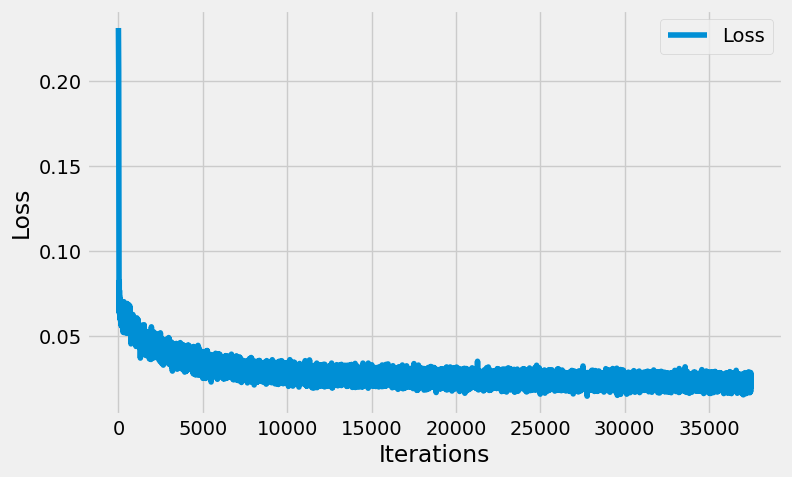

In [6]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 5))
plt.plot(losses, label="Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()

In [8]:
torch.save(model.state_dict(), "../output/autoencoder_sub_weights.pth")
torch.save(model, "../output/autoencoder_sub_weights.pth")
print("Saved")

Saved
